In [ ]:
!pip install catboost
!pip install pycaret

Load in the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing (k-1 dummies)

In [209]:
import pandas as pd

df_train = pd.read_csv("/content/drive/My Drive/DBA3803 Project 2/Project2_Train.csv")

df_test = pd.read_csv("/content/drive/My Drive/DBA3803 Project 2/Project2_Test.csv")

df_train.drop(columns=['id'], inplace = True)

df_test.drop(columns=['id'], inplace = True)

Convert to categorical data

In [210]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()


df_train.Gender = encoder.fit_transform(df_train.Gender)

df_train.Vehicle_Damage = encoder.fit_transform(df_train.Vehicle_Damage)


df_test.Gender = encoder.fit_transform(df_test.Gender)

df_test.Vehicle_Damage = encoder.fit_transform(df_test.Vehicle_Damage)

One-hot Encoding (k-1 variables)

In [211]:
region = pd.get_dummies(df_train.Region_Code, drop_first=True)

df_train = pd.concat([df_train, region], axis=1, sort=False)

df_train.drop(columns=['Region_Code'], inplace = True)


Vehicle_Age = pd.get_dummies(df_train.Vehicle_Age, drop_first=True)

df_train = pd.concat([df_train, Vehicle_Age], axis=1, sort=False)

df_train.drop(columns=['Vehicle_Age'], inplace = True)


region = pd.get_dummies(df_test.Region_Code, drop_first=True)

df_test = pd.concat([df_test, region], axis=1, sort=False)

df_test.drop(columns=['Region_Code'], inplace = True)


Vehicle_Age = pd.get_dummies(df_test.Vehicle_Age, drop_first=True)

df_test = pd.concat([df_test, Vehicle_Age], axis=1, sort=False)

df_test.drop(columns=['Vehicle_Age'], inplace = True)


df_train

,Gender,Age,Vehicle_Damage,Annual_Premium,Vintage,Response,8,11,15,28,29,30,41,46,50,< 1 Year,> 2 Years
0,1,22,1,29719,79,0,0,0,0,0,0,0,0,1,0,1,0
1,0,40,1,29645,99,0,0,0,0,1,0,0,0,0,0,0,0
2,1,25,1,35996,266,1,0,0,0,1,0,0,0,0,0,0,0
3,0,25,0,56899,25,0,0,0,0,0,1,0,0,0,0,1,0
4,0,70,0,47452,189,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,28,1,2630,31,1,0,0,0,0,0,0,1,0,0,1,0
9996,1,43,1,28945,66,0,0,0,0,0,0,0,0,1,0,0,1
9997,0,46,0,2630,286,0,0,0,0,1,0,0,0,0,0,0,0
9998,0,21,0,23031,155,0,0,0,0,0,0,1,0,0,0,1,0


In [212]:
df_test.columns

Index([        'Gender',            'Age', 'Vehicle_Damage', 'Annual_Premium',
              'Vintage',       'Response',                8,               11,
                     15,               28,               29,               30,
                     41,               46,               50,       '< 1 Year',
            '> 2 Years'],
      dtype='object')

In [213]:
target = 'Response'
features = [f for f in df_train.columns if f != target]

X_train = df_train[features].values
y_train = df_train[target].values

X_test = df_test[features].values
y_test = df_test[target].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(10000, 16) (10000,) (10000, 16) (10000,)


# Data Preprocessing (k dummies)

In [234]:
import pandas as pd

df_train = pd.read_csv("/content/drive/My Drive/DBA3803 Project 2/Project2_Train.csv")

df_test = pd.read_csv("/content/drive/My Drive/DBA3803 Project 2/Project2_Test.csv")

df_train.drop(columns=['id'], inplace = True)

df_test.drop(columns=['id'], inplace = True)

Convert to categorical data

In [235]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()


df_train.Gender = encoder.fit_transform(df_train.Gender)

df_train.Vehicle_Damage = encoder.fit_transform(df_train.Vehicle_Damage)


df_test.Gender = encoder.fit_transform(df_test.Gender)

df_test.Vehicle_Damage = encoder.fit_transform(df_test.Vehicle_Damage)

One-hot Encoding (k variables)

In [236]:
region = pd.get_dummies(df_train.Region_Code)

df_train = pd.concat([df_train, region], axis=1, sort=False)

df_train.drop(columns=['Region_Code'], inplace = True)


Vehicle_Age = pd.get_dummies(df_train.Vehicle_Age)

df_train = pd.concat([df_train, Vehicle_Age], axis=1, sort=False)

df_train.drop(columns=['Vehicle_Age'], inplace = True)


region = pd.get_dummies(df_test.Region_Code)

df_test = pd.concat([df_test, region], axis=1, sort=False)

df_test.drop(columns=['Region_Code'], inplace = True)


Vehicle_Age = pd.get_dummies(df_test.Vehicle_Age)

df_test = pd.concat([df_test, Vehicle_Age], axis=1, sort=False)

df_test.drop(columns=['Vehicle_Age'], inplace = True)


df_train

,Gender,Age,Vehicle_Damage,Annual_Premium,Vintage,Response,3,8,11,15,28,29,30,41,46,50,1-2 Year,< 1 Year,> 2 Years
0,1,22,1,29719,79,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,40,1,29645,99,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,25,1,35996,266,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,25,0,56899,25,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,70,0,47452,189,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,28,1,2630,31,1,0,0,0,0,0,0,0,1,0,0,0,1,0
9996,1,43,1,28945,66,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9997,0,46,0,2630,286,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9998,0,21,0,23031,155,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [237]:
df_test.columns

Index([        'Gender',            'Age', 'Vehicle_Damage', 'Annual_Premium',
              'Vintage',       'Response',                3,                8,
                     11,               15,               28,               29,
                     30,               41,               46,               50,
             '1-2 Year',       '< 1 Year',      '> 2 Years'],
      dtype='object')

In [238]:
target = 'Response'
features = [f for f in df_train.columns if f != target]

X_train = df_train[features].values
y_train = df_train[target].values

X_test = df_test[features].values
y_test = df_test[target].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(10000, 18) (10000,) (10000, 18) (10000,)


# Logistic Regression

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

logreg = LogisticRegression(random_state=0,
                           max_iter=10000,
                           verbose=0,
                           class_weight="balanced",
                           C=7)

logreg = logreg.fit(X_train, y_train)

np.mean(cross_val_score(logreg, X_train, y_train, cv=5, scoring="roc_auc"))

0.7644247093809117

Table of features

In [202]:
tb1 = pd.DataFrame({"Features": features, "Coefficients": logreg.coef_.ravel()})

tb1 = tb1.sort_values(by='Coefficients', ascending=False)

tb1.reset_index(drop=True, inplace=True)

tb1

,Features,Coefficients
0,Vehicle_Damage,2.832082
1,28,0.858567
2,> 2 Years,0.324695
3,Gender,0.059161
4,Annual_Premium,-0.000007
5,Vintage,-0.000065
6,11,-0.017935
7,29,-0.026272
8,Age,-0.036203
9,41,-0.070143


Create Interaction Terms

In [203]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, interaction_only=True)

X_train = poly.fit_transform(X_train)

X_test = poly.fit_transform(X_test)

In [252]:
len(poly.get_feature_names())

137

In [205]:
poly.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': True, 'order': 'C'}

In [206]:
logreg = LogisticRegression(random_state=0,
                           max_iter=10000,
                           verbose=0,
                           class_weight="balanced",
                           C=7,
                           n_jobs=-1)

logreg = logreg.fit(X_train, y_train)

np.mean(cross_val_score(logreg, X_train, y_train, cv=5, scoring="roc_auc"))

0.8106157462271308

Table with interaction features

In [207]:
tb2 = pd.DataFrame({"Features": poly.get_feature_names(), "Coefficients": logreg.coef_.ravel()})

tb2 = tb2.sort_values(by='Coefficients', ascending=False)

tb2.reset_index(drop=True, inplace=True)

tb2.head(16)

,Features,Coefficients
0,x2 x3,1.264551e-04
1,x1 x4,3.493797e-05
2,x3 x6,1.903935e-05
3,x3 x9,5.481956e-06
4,x3 x11,4.329594e-06
5,x2 x4,4.187664e-06
6,x3 x15,4.072772e-06
7,x0 x3,2.430544e-06
8,x1 x2,1.270218e-06
9,x4,1.117464e-06


Feature Selection using RFE (Top 10)

In [ ]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression(random_state=0,
                           max_iter=10000,
                           verbose=1,
                           class_weight="balanced",
                           C=7,
                           n_jobs=-1)

rfe = RFE(logreg, 10)

logreg = rfe.fit(X_train, y_train)

np.mean(cross_val_score(logreg, X_train, y_train, cv=5, scoring="roc_auc"))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

0.8033437496408737

In [ ]:
logreg.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
logreg.ranking_

array([ 37,  39,   1,  31,  11,   5,  51,  64,  63,  42,  71,  79,  61,
        70,  69,  41,  59,   1,  35,  24,   2,  48,  88,  75,  45,  72,
        73,  90,  86,  82,  65,  54,   1,  25,   8,   1,   1,  30,   7,
        38,  32,  29,  34,  60,  28,   3,  10,   1,  43,  62,  83,  36,
        50,  53,  46,  66,  74,  44,  58,  27,  19,  12,  22,  13,  14,
        23,  15,  18,  21,  16,  20,   6,   4,   1,   9,  68,  33,  17,
         1,   1,   1,  26, 121, 123, 119, 118, 126, 127, 125, 116,  47,
        76,  99,  96, 100, 101, 109,  95, 107,  67,  87, 115, 108, 103,
       111, 112, 114,  49,  91, 105,  94, 104, 106,  98,  40,  55, 124,
       122, 120, 117,  78,  81,  97, 110, 113,  56,  84,  92,  93,  77,
        80, 102,  52,  89,  57,  85, 128])

Table with RFE

In [208]:
coef = [False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

rank = [37,  39,   1,  31,  11,   5,  51,  64,  63,  42,  71,  79,  61,
        70,  69,  41,  59,   1,  35,  24,   2,  48,  88,  75,  45,  72,
        73,  90,  86,  82,  65,  54,   1,  25,   8,   1,   1,  30,   7,
        38,  32,  29,  34,  60,  28,   3,  10,   1,  43,  62,  83,  36,
        50,  53,  46,  66,  74,  44,  58,  27,  19,  12,  22,  13,  14,
        23,  15,  18,  21,  16,  20,   6,   4,   1,   9,  68,  33,  17,
         1,   1,   1,  26, 121, 123, 119, 118, 126, 127, 125, 116,  47,
        76,  99,  96, 100, 101, 109,  95, 107,  67,  87, 115, 108, 103,
       111, 112, 114,  49,  91, 105,  94, 104, 106,  98,  40,  55, 124,
       122, 120, 117,  78,  81,  97, 110, 113,  56,  84,  92,  93,  77,
        80, 102,  52,  89,  57,  85, 128]

tb3 = pd.DataFrame({"Features": poly.get_feature_names(), "Coefficients": coef, "Ranking": rank})

tb3 = tb3.sort_values(by='Ranking', ascending=True)

tb3.reset_index(drop=True, inplace=True)

tb3.head(10)

,Features,Coefficients,Ranking
0,x1,True,1
1,x1 x5,True,1
2,x0 x1,True,1
3,x4 x14,True,1
4,x4 x13,True,1
5,x4 x12,True,1
6,x2 x4,True,1
7,x1 x6,True,1
8,x1 x2,True,1
9,x4 x7,True,1


In [215]:
y_pred = logreg.predict(X_test)

In [216]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score

roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
sensitivity = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

specificity = TN / (TN + FP)

print(f'ROC AUC Score = {roc_auc}\n')
print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Sensitivity = {sensitivity}')
print(f'Specificity = {specificity}\n')
print(confusion)

ROC AUC Score = 0.7622764082426561

Accuracy = 0.6907
Precision = 0.28795683100318864
Sensitivity = 0.8607038123167156
Specificity = 0.6638490041685966

[[5733 2903]
 [ 190 1174]]


# Classification Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

dt = DecisionTreeClassifier(random_state=0)

param_dist = {'min_samples_leaf' : [0.05,0.06,0.065,0.07,0.075,0.08,0.09], #minimally 500 observations per leaf
              'max_depth' : range(4,7),
              'max_features' : range(14,19)}

dt = GridSearchCV(dt,
                  param_grid=param_dist,
                  scoring="roc_auc", 
                  cv = 5,
                  verbose=10, 
                  n_jobs=-1,
                  refit="roc_auc") #use all processors

dt = dt.fit(X_train, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0345s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0545s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0950s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1712s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 510 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 525 o

In [ ]:
dt.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=17, min_samples_leaf=0.07,
                       random_state=0)

In [239]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(ccp_alpha=0.0, 
                            class_weight=None, 
                            criterion='gini',
                            max_depth=5, 
                            max_features=17, 
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None,
                            min_samples_leaf=0.07, 
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0,
                            random_state=0, 
                            splitter='best')

dt.fit(X_train, y_train)

np.mean(cross_val_score(dt, X_train, y_train, cv=5, scoring="roc_auc"))

0.8224623176796481

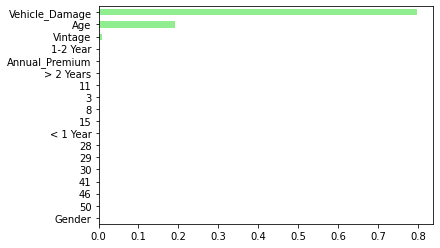

In [224]:
from matplotlib import pyplot as plt
importances_dt = pd.Series(dt.feature_importances_, index = df_train[features].columns)

sorted_importances_dt = importances_dt.sort_values()

sorted_importances_dt.plot(kind = 'barh', color = 'lightgreen'); plt.show()

[Text(643.8461538461538, 1096.26, 'Vehicle_Damage <= 0.5\ngini = 0.23\nsamples = 10000\nvalue = [8674, 1326]'),
 Text(429.23076923076917, 896.94, '1-2 Year <= 0.5\ngini = 0.009\nsamples = 4884\nvalue = [4862, 22]'),
 Text(257.53846153846155, 697.62, 'Vintage <= 231.5\ngini = 0.003\nsamples = 2974\nvalue = [2969, 5]'),
 Text(171.69230769230768, 498.29999999999995, 'Annual_Premium <= 37351.5\ngini = 0.001\nsamples = 2266\nvalue = [2265, 1]'),
 Text(85.84615384615384, 298.98, 'gini = 0.0\nsamples = 1565\nvalue = [1565, 0]'),
 Text(257.53846153846155, 298.98, 'gini = 0.003\nsamples = 701\nvalue = [700, 1]'),
 Text(343.38461538461536, 498.29999999999995, 'gini = 0.011\nsamples = 708\nvalue = [704, 4]'),
 Text(600.9230769230769, 697.62, 'Age <= 44.5\ngini = 0.018\nsamples = 1910\nvalue = [1893, 17]'),
 Text(515.0769230769231, 498.29999999999995, 'gini = 0.035\nsamples = 782\nvalue = [768, 14]'),
 Text(686.7692307692307, 498.29999999999995, 'gini = 0.005\nsamples = 1128\nvalue = [1125, 3]'),


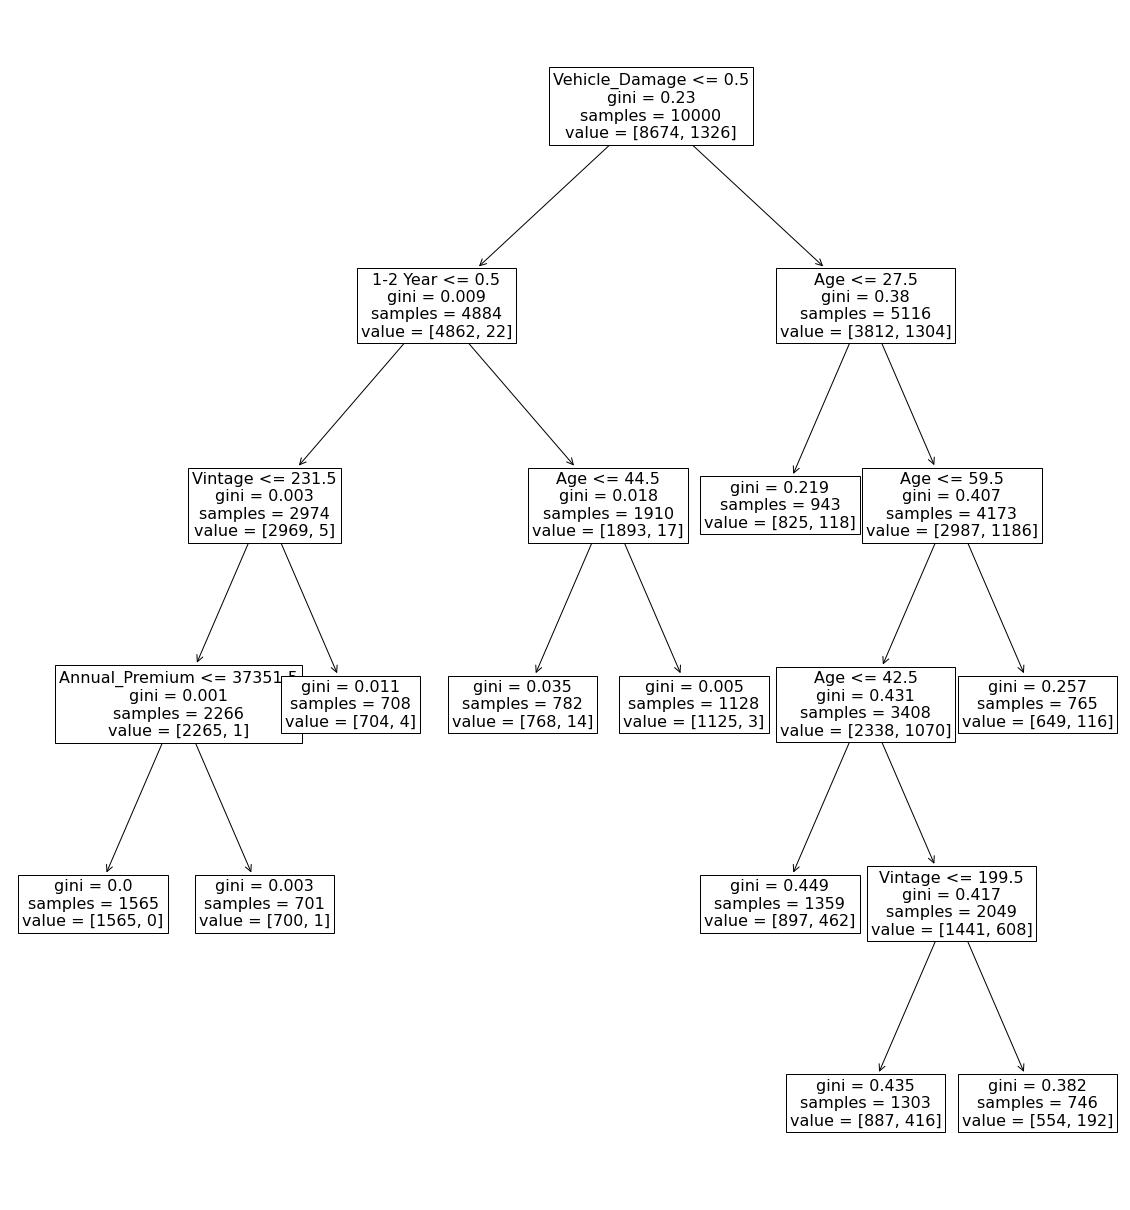

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,22))
tree.plot_tree(dt, feature_names=df_train[features].columns, fontsize = 16)

In [225]:
y_pred = dt.predict(X_test)

In [226]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score

roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
sensitivity = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

specificity = TN / (TN + FP)

print(f'ROC AUC Score = {roc_auc}\n')
print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Sensitivity = {sensitivity}')
print(f'Specificity = {specificity}\n')
print(confusion)

ROC AUC Score = 0.5

Accuracy = 0.8636
Precision = 0.0
Sensitivity = 0.0
Specificity = 1.0

[[8636    0]
 [1364    0]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0,
                           n_estimators=1000,
                           verbose=1)

param_dist = {"max_depth": range(1,5),
              "min_samples_split": [2,4,6],
              "min_samples_leaf": [1,2,3],
              "class_weight": ["balanced", "balanced_subsample",None]}

rf = GridSearchCV(rf,
                  param_grid=param_dist,
                  scoring="roc_auc", 
                  cv = 3,
                  verbose=10, 
                  n_jobs=-1,
                  refit="roc_auc") #use all processors

rf = rf.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  6

In [ ]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

In [227]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True, 
                            ccp_alpha=0.0, 
                            class_weight='balanced',
                            criterion='gini', 
                            max_depth=4, 
                            max_features='auto',
                            max_leaf_nodes=None, 
                            max_samples=None,
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None,
                            min_samples_leaf=1, 
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0, 
                            n_estimators=1000,
                            n_jobs=-1, 
                            oob_score=False, 
                            random_state=0, 
                            verbose=0,
                            warm_start=False)

rf.fit(X_train, y_train)

np.mean(cross_val_score(rf, X_train, y_train, cv=5, scoring="roc_auc"))

0.8201156719829455

In [228]:
y_pred = rf.predict(X_test)

In [229]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score

roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
sensitivity = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

specificity = TN / (TN + FP)

print(f'ROC AUC Score = {roc_auc}\n')
print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Sensitivity = {sensitivity}')
print(f'Specificity = {specificity}\n')
print(confusion)

ROC AUC Score = 0.7688705738374044

Accuracy = 0.6733
Precision = 0.2817159899059417
Sensitivity = 0.9002932551319648
Specificity = 0.637447892542844

[[5505 3131]
 [ 136 1228]]


# Pycaret

Set up data

In [ ]:
from pycaret.classification import * 

exp_clf = setup(df_train, target = 'Response')

Setup Succesfully Completed!


,Description,Value
0,session_id,5078
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(10000, 8)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Models Benchmark

In [ ]:
best = compare_models(sort = 'AUC', exclude=["xgboost"]) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.8663,0.8260,0.0022,0.1500,0.0042,0.0009,0.0057,0.7495
1,Ada Boost Classifier,0.8651,0.8255,0.0248,0.3874,0.0461,0.0302,0.0670,0.2816
2,Linear Discriminant Analysis,0.8664,0.8228,0.0022,0.1333,0.0042,0.0012,0.0070,0.0330
3,Light Gradient Boosting Machine,0.8581,0.8224,0.0560,0.3049,0.0938,0.0558,0.0800,0.1079
4,CatBoost Classifier,0.8611,0.8220,0.0474,0.3387,0.0827,0.0516,0.0827,3.4821
5,Naive Bayes,0.7557,0.8095,0.6142,0.2968,0.3998,0.2693,0.2977,0.0070
6,Extra Trees Classifier,0.8464,0.7963,0.1627,0.3410,0.2182,0.1452,0.1583,0.4503
7,Logistic Regression,0.8634,0.7828,0.0162,0.1802,0.0296,0.0148,0.0282,0.1119
8,Random Forest Classifier,0.8507,0.7743,0.1336,0.3427,0.1916,0.1264,0.1439,0.1122
9,Decision Tree Classifier,0.8101,0.5957,0.3038,0.2906,0.2967,0.1871,0.1874,0.0257


# Gradient Boosting Classifier

In [230]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

gbc = GradientBoostingClassifier(ccp_alpha=0.0, 
                                 criterion='friedman_mse',
                                 learning_rate=0.03, 
                                 loss='deviance', 
                                 max_depth=1,
                                 max_features='auto', 
                                 max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, 
                                 min_impurity_split=None,
                                 min_samples_leaf=1, 
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, 
                                 n_estimators=1000,
                                 random_state=0, 
                                 subsample=1.0, 
                                 tol=0.0001,
                                 validation_fraction=0.1, 
                                 verbose=0,
                                 warm_start=False)

param_dist = {"learning_rate" : [0.03, 0.035, 0.04, 0.045]}

# param_dist = {"learning_rate" : [0.3, 0.1, 0.03, 0.001],
#               "max_depth": range(1,5),
#               "min_samples_split": [2,4,6]}

gbc = GridSearchCV(gbc,
                   param_grid=param_dist,
                   scoring="roc_auc", 
                   cv = 5,
                   verbose=10, 
                   n_jobs=-1,
                   refit="roc_auc") #use all processors

gbc = gbc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


In [231]:
gbc.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.04, loss='deviance', max_depth=1,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [232]:
from sklearn.model_selection import cross_val_score

gbc = GradientBoostingClassifier(ccp_alpha=0.0, 
                                 criterion='friedman_mse',
                                 learning_rate=0.04, 
                                 loss='deviance', 
                                 max_depth=1,
                                 max_features='auto', 
                                 max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, 
                                 min_impurity_split=None,
                                 min_samples_leaf=1, 
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, 
                                 n_estimators=1000,
                                 random_state=0, 
                                 subsample=1.0, 
                                 tol=0.0001,
                                 validation_fraction=0.1, 
                                 verbose=0,
                                 warm_start=False)

gbc.fit(X_train, y_train)

np.mean(cross_val_score(gbc, X_train, y_train, cv=5, scoring="roc_auc"))

0.827537900138692

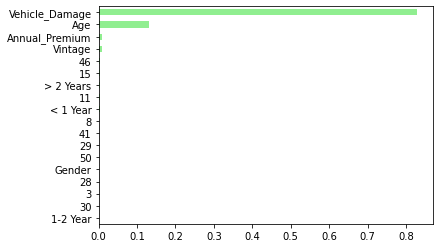

In [233]:
importances_gbc = pd.Series(gbc.feature_importances_, index = df_train[features].columns)

sorted_importances_gbc = importances_gbc.sort_values()

sorted_importances_gbc.plot(kind = 'barh', color = 'lightgreen'); plt.show()

# logreg + rf ensemble

In [91]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('lr', logreg), ('rf', rf)], voting='soft')

eclf = eclf.fit(X_train, y_train)

np.mean(cross_val_score(eclf, X_train, y_train, cv=5, scoring="roc_auc"))

0.815872169626793

In [92]:
y_pred = eclf.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score

roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
sensitivity = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

specificity = TN / (TN + FP)

print(f'ROC AUC Score = {roc_auc}\n')
print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Sensitivity = {sensitivity}')
print(f'Specificity = {specificity}\n')
print(confusion)

ROC AUC Score = 0.7743468655386508

Accuracy = 0.6609
Precision = 0.27798466593647314
Sensitivity = 0.9303519061583577
Specificity = 0.618341824918944

[[5340 3296]
 [  95 1269]]


# Benefit Structure

In [245]:
y_prob = dt.predict_proba(X_test)

In [246]:
import pandas as pd

result = pd.DataFrame({"Probabilities": y_prob[:,1]})

result

,Probabilities
0,0.125133
1,0.125133
2,0.319263
3,0.339956
4,0.319263
...,...
9995,0.002660
9996,0.319263
9997,0.017903
9998,0.339956


In [247]:
result['threshold(1%)'] = result.Probabilities > 0.01
result['threshold(10%)'] = result.Probabilities > 0.1
result['threshold(20%)'] = result.Probabilities > 0.2
result['threshold(50%)'] = result.Probabilities > 0.5

result['threshold(1%)'] = result['threshold(1%)'].astype(int)
result['threshold(10%)'] = result['threshold(10%)'].astype(int)
result['threshold(20%)'] = result['threshold(20%)'].astype(int)
result['threshold(50%)'] = result['threshold(50%)'].astype(int)

result

,Probabilities,threshold(1%),threshold(10%),threshold(20%),threshold(50%)
0,0.125133,1,1,0,0
1,0.125133,1,1,0,0
2,0.319263,1,1,1,0
3,0.339956,1,1,1,0
4,0.319263,1,1,1,0
...,...,...,...,...,...
9995,0.002660,0,0,0,0
9996,0.319263,1,1,1,0
9997,0.017903,1,0,0,0
9998,0.339956,1,1,1,0


In [248]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, result['threshold(1%)'])

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(confusion)

#Calculating Benefit Structure (Costs: Promote: +10, Miss -10, Promote Uninterested = -2, Promotion = -1)

BS1 = (TP+FP)*(-1)+TP*10+FP*-2+FN*-10

print(f'\nBenefit Structure = {BS1}\n')

#Calculating Benefit Structure (Costs: Promote: +100, Miss -100, Promote Uninterested = -2, Promotion = -1)

BS2 = (TP+FP)*(-1)+TP*100+FP*-2+FN*-100

print(f'Benefit Structure = {BS2}\n')

[[4042 4594]
 [  14 1350]]

Benefit Structure = -1772

Benefit Structure = 118468



In [249]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, result['threshold(10%)'])

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(confusion)

#Calculating Benefit Structure (Costs: Promote: +10, Miss -10, Promote Uninterested = -2, Promotion = -1)

BS1 = (TP+FP)*(-1)+TP*10+FP*-2+FN*-10

print(f'\nBenefit Structure = {BS1}\n')

#Calculating Benefit Structure (Costs: Promote: +100, Miss -100, Promote Uninterested = -2, Promotion = -1)

BS2 = (TP+FP)*(-1)+TP*100+FP*-2+FN*-100

print(f'Benefit Structure = {BS2}\n')

[[4773 3863]
 [  23 1341]]

Benefit Structure = 250

Benefit Structure = 118870



In [250]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, result['threshold(20%)'])

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(confusion)

#Calculating Benefit Structure (Costs: Promote: +10, Miss -10, Promote Uninterested = -2, Promotion = -1)

BS1 = (TP+FP)*(-1)+TP*10+FP*-2+FN*-10

print(f'\nBenefit Structure = {BS1}\n')

#Calculating Benefit Structure (Costs: Promote: +100, Miss -100, Promote Uninterested = -2, Promotion = -1)

BS2 = (TP+FP)*(-1)+TP*100+FP*-2+FN*-100

print(f'Benefit Structure = {BS2}\n')

[[6248 2388]
 [ 273 1091]]

Benefit Structure = -75

Benefit Structure = 73545



In [251]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, result['threshold(50%)'])

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(confusion)

#Calculating Benefit Structure (Costs: Promote: +10, Miss -10, Promote Uninterested = -2, Promotion = -1)

BS1 = (TP+FP)*(-1)+TP*10+FP*-2+FN*-10

print(f'\nBenefit Structure = {BS1}\n')

#Calculating Benefit Structure (Costs: Promote: +100, Miss -100, Promote Uninterested = -2, Promotion = -1)

BS2 = (TP+FP)*(-1)+TP*100+FP*-2+FN*-100

print(f'Benefit Structure = {BS2}\n')

[[8636    0]
 [1364    0]]

Benefit Structure = -13640

Benefit Structure = -136400

